In [11]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

def pairwise(ls): return (zip(ls,ls[1:]))
def mapKey(ls): return lambda key : [x[key] for x in ls]
def table(data): return pd.DataFrame(data).style

# Sample data

In [12]:
height = 1.80
data = [
    {"date": "2020-02-29", "weight": 103.6, "muscle": 71.3, "p_fat": 27.6, "waistline": 114 },
    {"date": "2020-03-07", "weight": 102.2, "muscle": 69.2, "p_fat": 28.8, "waistline": 113 },
    {"date": "2020-03-14", "weight": 102.3, "muscle": 73.2, "p_fat": 24.7, "waistline": 112 },
    {"date": "2020-03-22", "weight": 100.8, "muscle": 70.0, "p_fat": 27.0, "waistline": 109 },
    {"date": "2020-03-27", "weight":  99.8, "muscle": 69.5, "p_fat": 26.8, "waistline": 107 },
    {"date": "2020-04-04", "weight":  99.3, "muscle": 69.3, "p_fat": 26.6, "waistline": 105 },
    {"date": "2020-04-11", "weight":  98.6, "muscle": 70.0, "p_fat": 25.3, "waistline": 103 },

]

## Some computations

Add some values

In [13]:
for d in data: 
    d["fat"]  = round(d["p_fat"] / 100 * d["weight"], 1)
    d["BMI"]  = round(d["weight"] / height / height, 2)
    #d["date"] = datetime.strptime(d["date"], "%Y-%m-%d")

table(data)

,date,weight,muscle,p_fat,waistline,fat,BMI
0,2020-02-29,103.6,71.3,27.6,114,28.6,31.98
1,2020-03-07,102.2,69.2,28.8,113,29.4,31.54
2,2020-03-14,102.3,73.2,24.7,112,25.3,31.57
3,2020-03-22,100.8,70,27,109,27.2,31.11
4,2020-03-27,99.8,69.5,26.8,107,26.7,30.8
5,2020-04-04,99.3,69.3,26.6,105,26.4,30.65
6,2020-04-11,98.6,70,25.3,103,24.9,30.43


Add deltas

In [14]:
def computeDeltas(_data):
    _deltas = []
    for (prev,curr) in pairwise(_data): 
        dd = {
            "date": curr["date"], 
            "prev": prev["date"]
        }
        
        for k in ["weight", "muscle", "fat", "waistline","BMI"]:
            dd["d_"+k] = round(curr[k] - prev[k],2) 
        
        _deltas.append(dd)
    return _deltas

deltas = computeDeltas(data)
pd.DataFrame(deltas).style

,date,prev,d_weight,d_muscle,d_fat,d_waistline,d_BMI
0,2020-03-07,2020-02-29,-1.4,-2.1,0.8,-1,-0.44
1,2020-03-14,2020-03-07,0.1,4,-4.1,-1,0.03
2,2020-03-22,2020-03-14,-1.5,-3.2,1.9,-3,-0.46
3,2020-03-27,2020-03-22,-1,-0.5,-0.5,-2,-0.31
4,2020-04-04,2020-03-27,-0.5,-0.2,-0.3,-2,-0.15
5,2020-04-11,2020-04-04,-0.7,0.7,-1.5,-2,-0.22


Total

In [15]:
table(computeDeltas([data[0],data[-1]]))

,date,prev,d_weight,d_muscle,d_fat,d_waistline,d_BMI
0,2020-04-11,2020-02-29,-5,-1.3,-3.7,-11,-1.55


## Plots

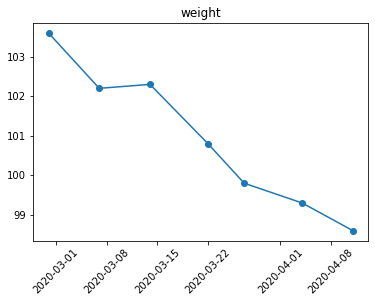

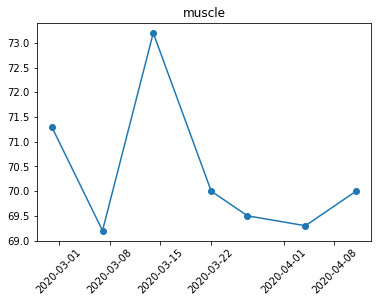

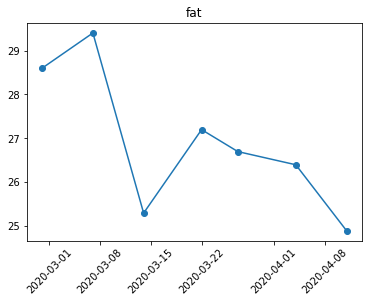

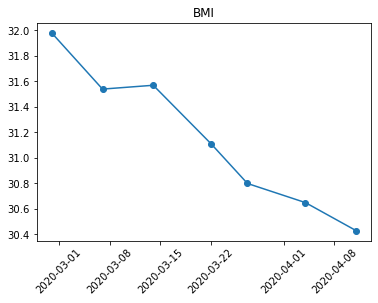

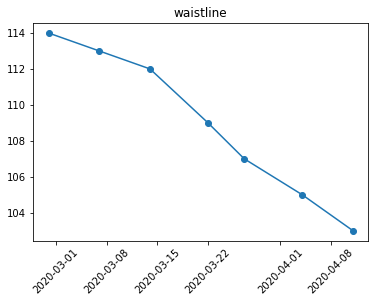

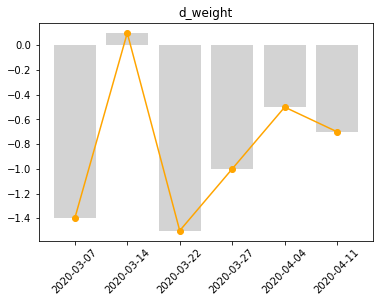

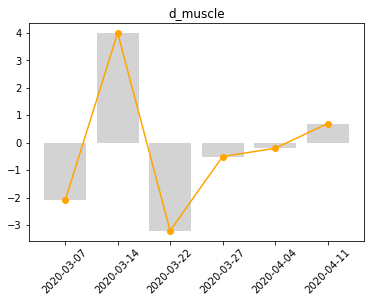

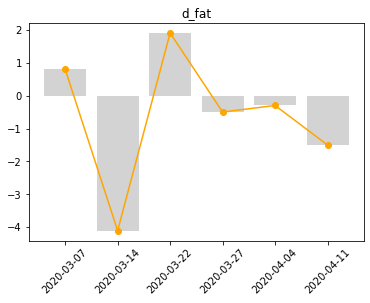

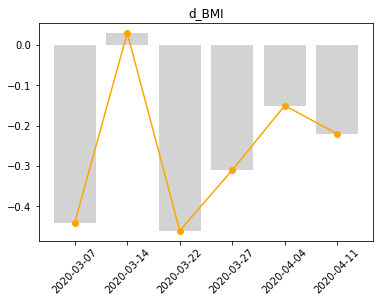

In [16]:
dataKey = lambda key: mapKey(data)(key) if key != "date" else [datetime.strptime(d, "%Y-%m-%d") for d in mapKey(data)(key)]

keys = ["weight", "muscle","fat","BMI", "waistline"]
for k in keys:
    plt.plot(dataKey("date"),dataKey(k),"o-")
    plt.title(k)
    plt.xticks(rotation=45)
    plt.show()


deltasKey = mapKey(deltas)
keys = ["d_weight", "d_muscle","d_fat","d_BMI"]
for k in keys:
    plt.bar(deltasKey("date"),deltasKey(k), color="lightgrey")
    plt.plot(deltasKey("date"),deltasKey(k), "o-", color="orange")
    plt.title(k)
    plt.xticks(rotation=45)
    plt.show()